In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [59]:
from Code import plot_physio

## Set Paths and Parameters

In [60]:
# ToDo: Adapt wave and problematic subject list
wave = 2

In [61]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [62]:
SA_score="SPAI"

In [63]:
df_scores = pd.read_csv(os.path.join(file_path, 'scores_summary.csv'), decimal='.', sep=';')
df_scores = df_scores.loc[~df_scores['exclude']]
median = df_scores[SA_score].median()

## Physiology

In [64]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Physiology')
if not os.path.exists(save_path):
    print('creating path for saving')
    os.makedirs(save_path)

In [65]:
for physiology in ("hr", "eda"):
    df = pd.read_csv(os.path.join(file_path, f'{physiology}.csv'), decimal='.', sep=';')
    df = df.loc[~(df["Phase"].str.contains("Interaction") | df["Phase"].str.contains("Clicked") | df["Phase"].str.contains("resting") | df["Phase"].str.contains("Visible"))]
    df.loc[df["Phase"].str.contains("Orientation"), "phase"] = "Orientation"
    df.loc[df["Phase"].str.contains("Habituation"), "phase"] = "Habituation"
    df.loc[df["Phase"].str.contains("Test"), "phase"] = "Test"

    df_grouped = df.groupby(["VP", "phase"]).sum(numeric_only=True).reset_index()
    df_grouped.loc[df_grouped["phase"].str.contains("Orientation"), "total_duration"] = 30
    df_grouped.loc[df_grouped["phase"].str.contains("Habituation"), "total_duration"] = 180
    df_grouped.loc[df_grouped["phase"].str.contains("Test"), "total_duration"] = 180
    df_grouped["prop_duration"] = df_grouped["Duration"]/df_grouped["total_duration"]
    df_grouped.loc[df_grouped["prop_duration"] > 1, "prop_duration"] = 1

    df_grouped = df_grouped.groupby(["VP"]).mean(numeric_only=True).reset_index()

    df_check = df_grouped.loc[df_grouped["prop_duration"] >= .75]
    print(f"Participants included for {physiology}-analysis: {len(df_check['VP'].unique())}, "
          f"remaining participants had {round(df_check['prop_duration'].mean() * 100, 2)}% (SD={round(df_check['prop_duration'].std() * 100, 2)}%) usable data")


Participants included for hr-analysis: 42, remaining participants had 99.81% (SD=0.92%) usable data
Participants included for eda-analysis: 41, remaining participants had 98.74% (SD=3.75%) usable data


HR: N = 42


  2%|▏         | 16/1000 [00:06<07:03,  2.32it/s]


KeyboardInterrupt: 

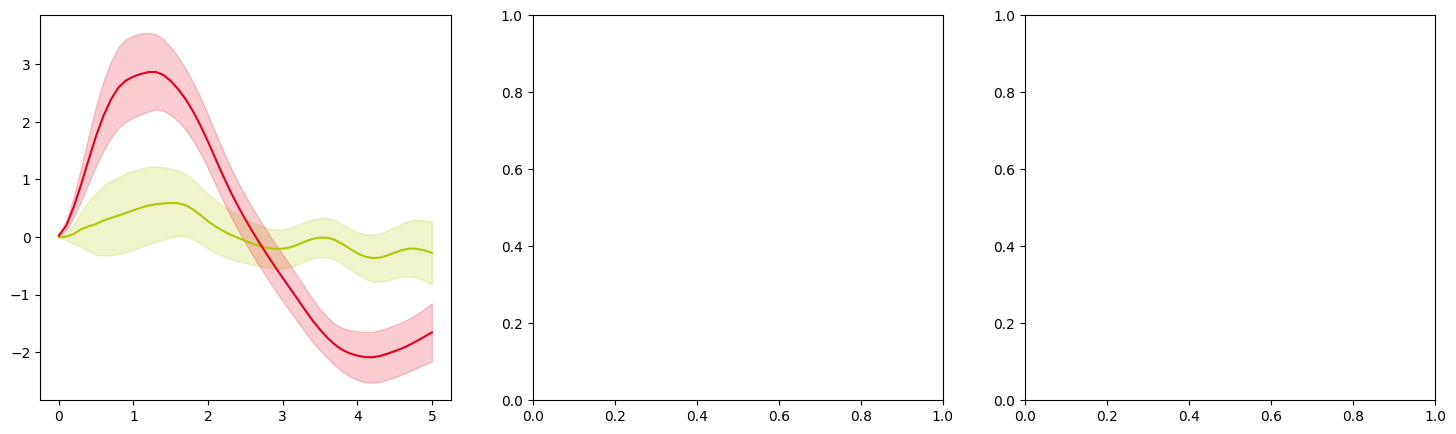

In [66]:
plot_physio.plot_physio_acq(file_path, save_path, test="F", SA_score="SPAI", permutations=1000)
plt.savefig(os.path.join(save_path, f"physiology_acq.png"), dpi=300)

In [ ]:
SA_score = "SPAI"
plot_physio.plot_physio_test_sad(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_test_{SA_score}.png"), dpi=300, bbox_inches="tight")

plot_physio.plot_physio_diff(file_path, save_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_hab-test.png"), dpi=300, bbox_inches="tight")

if wave == 1:
    plot_physio.plot_physio_diff_sad(file_path, SA_score)
    plt.savefig(os.path.join(save_path, f"physiology_hab-test_{SA_score}.png"), dpi=300, bbox_inches="tight")